# Project Title:  
## Gene Expression Cancer RNA-Seq  

# Project Scope:  
* The primary goal of this project is to develop a machine learning model capable of accurately classifying and distinguishing between five distinct types of cancer through a multi-class classification approach.  

# Objective/Research Question:  
* Can machine learning algorithms demonstrate high accuracy in predicting and categorizing diverse cancer types based on a comprehensive set of 20,531 relevant features, thus offering valuable insights for early cancer diagnosis and informed treatment decisions?  

# Data Source:
* The dataset used in this project was collected from different sites  
* UC Irvine Machine Learning Repository  
* Synapse.org  

# Dataset Details:  
* The dataset contains information about five distinct types of cancer: Breast Cancer (BRCA), Kidney Renal Clear Cell Carcinoma (KIRC), Colon Adenocarcinoma (COAD), Lung Adenocarcinoma (LUAD), and Prostate Adenocarcinoma (PRAD).  
* The dataset comprises a total of 801 instances, with each instance representing a unique case or patient.    
* It features 20,531 gene entries, each associated with specific mRNA expression values.   
* These features have been chosen to aid in cancer diagnosis and classification.    
* https://www.synapse.org   
* https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq  

# Methodology  
### Data Gathering:  
* Research and identify suitable data sources and libraries. 
### Data Manipulation:  
* Perform essential data manipulation tasks, including data cleaning, preprocessing, and structuring, to ensure the dataset is prepared for analysis.  
### Data Visualization:   
* Utilize data visualization techniques to explore and analyze the dataset comprehensively.  
### Machine Learning Algorithms:
* Utilize machine learning algorithms, specifically random forests, to tackle the multiclass cancer classification problem.  
### Model evaluation:  
* Employ various performance metrics, including Accuracy, Precision, Recall, F1 Score, Confusion Matrix, and ROC Curve, to evaluate the classifier's performance.  







## Import the Required Libraries

In [173]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kde
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings("ignore")

### Read both datasets 

In [5]:
df1=pd.read_csv('/Users/hassan/Downloads/untitled folder/TCGA-PANCAN-HiSeq-801x20531/data.csv')
df2=pd.read_csv('/Users/hassan/Downloads/untitled folder/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [6]:
df1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
df2.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [8]:
# Merge the two datasets(df1 and df2)
df= pd.concat([df1, df2], axis=1)

In [9]:
# Save the data into one csv file
df.to_csv('concatenated_data.csv', index=False)

In [174]:
# Read the dataset
df=pd.read_csv('/Users/hassan/Downloads/untitled folder/concatenated_data.csv')

## Exploratory Data Analysis (EDA)

In [175]:
type(df)

pandas.core.frame.DataFrame

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20534 entries, Unnamed: 0 to Class
dtypes: float64(20531), object(3)
memory usage: 125.5+ MB


In [177]:
# Summary Statistics
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [178]:
df.columns

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526', 'gene_20527',
       'gene_20528', 'gene_20529', 'gene_20530', 'Unnamed: 0.1', 'Class'],
      dtype='object', length=20534)

In [179]:
df.rename(columns={'Unnamed: 0': 'sample_id'}, inplace=True)

In [180]:
#check the dimentianionality of the data(rows and columns)
df.shape

(801, 20534)

In [181]:
#Check the cancer type column name and make sure where its in the data set
df.columns[-1]

'Class'

In [182]:
# Convert the column names to lowercase.
df.columns = df.columns.str.lower()

In [183]:
#Check what the sample _id column look like
df['sample_id'].head(10)

0    sample_0
1    sample_1
2    sample_2
3    sample_3
4    sample_4
5    sample_5
6    sample_6
7    sample_7
8    sample_8
9    sample_9
Name: sample_id, dtype: object

In [184]:
# Drop unnecessary column
df.drop(columns=['unnamed: 0.1'], inplace=True)

In [185]:
#Check the last few rows of the dataset
df.tail()

,sample_id,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,class
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000,PRAD


In [186]:
# Is there any missing value?
df.isna().any().any()

False

In [187]:
#Check for duplicate values
df.duplicated().sum()

0

The data has no missing and duplicate values

In [188]:
#Check how many cancer type in the class column
value_counts=df['class'].value_counts()
value_counts

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: class, dtype: int64

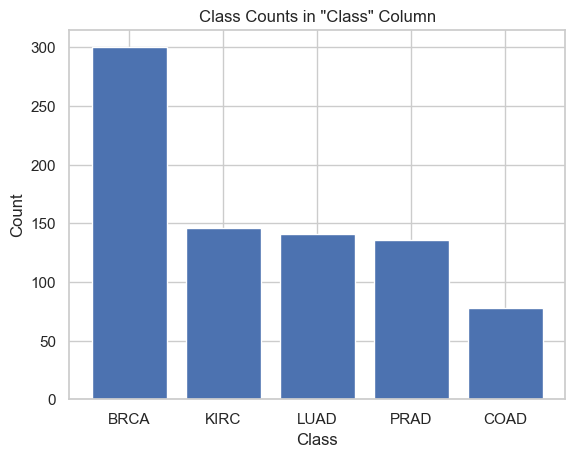

In [189]:
#Visualize using bar plot to show the distribution of different cancer types in the dataset
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in "Class" Column')
plt.show()

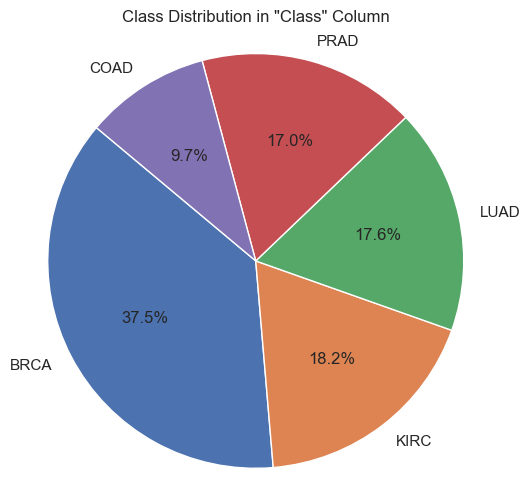

In [190]:
# Create pie chart for class(cancer type) distribution
# This will help in understanding the class balance and potential class imbalances.
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Class Distribution in "Class" Column')
plt.show()

In [191]:
# Check the datatype of the gene columns
gene_columns = df.loc[:, 'gene_0':'gene_20530']
print(gene_columns.dtypes)

gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
               ...   
gene_20526    float64
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Length: 20531, dtype: object


### Plot the distribution of multiple genes

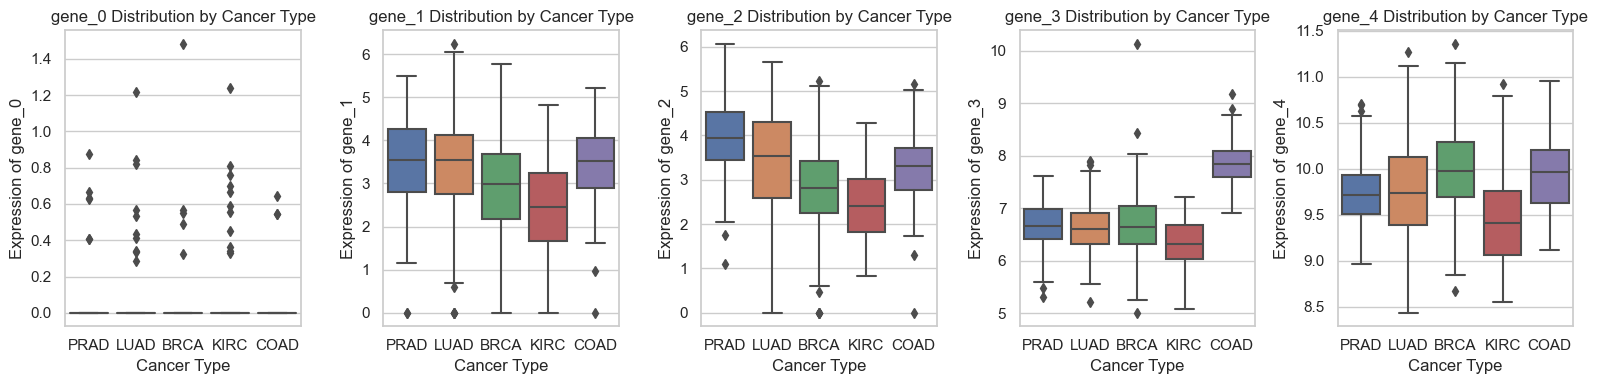

In [192]:
genes_group1 = ['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4']
fig, axes = plt.subplots(nrows=1, ncols=len(genes_group1), figsize=(16, 4))

for i, gene in enumerate(genes_group1):
    sns.boxplot(data=df, x='class', y=gene, ax=axes[i])
    axes[i].set_xlabel('Cancer Type')
    axes[i].set_ylabel(f'Expression of {gene}')
    axes[i].set_title(f'{gene} Distribution by Cancer Type')
    
plt.tight_layout()
plt.show()

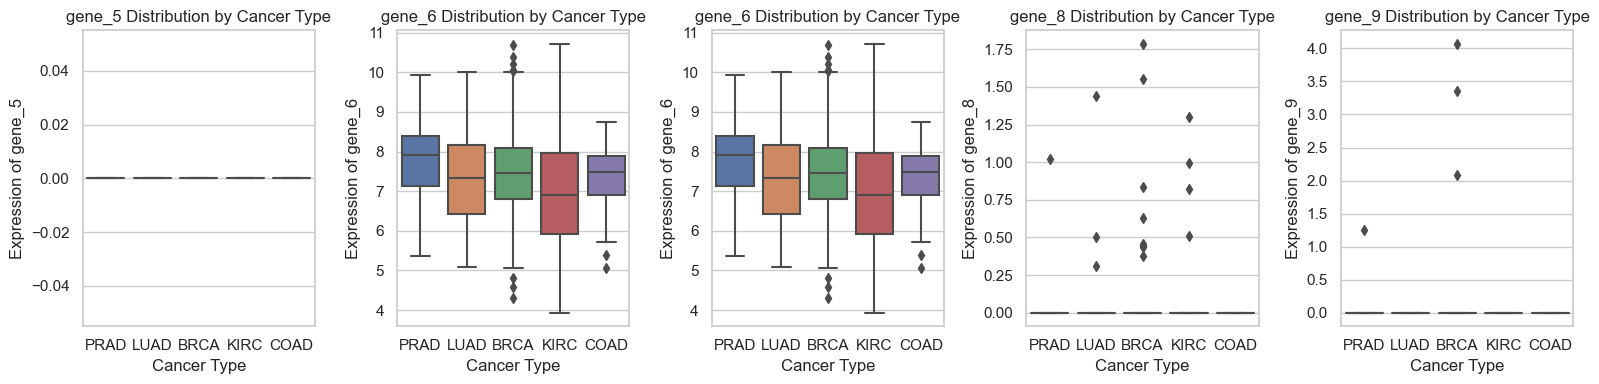

In [193]:
genes_group2 = ['gene_5','gene_6', 'gene_6', 'gene_8', 'gene_9']

fig, axes = plt.subplots(nrows=1, ncols=len(genes_group2), figsize=(16, 4))

for i, gene in enumerate(genes_group2):
    sns.boxplot(data=df, x='class', y=gene, ax=axes[i])
    axes[i].set_xlabel('Cancer Type')
    axes[i].set_ylabel(f'Expression of {gene}')
    axes[i].set_title(f'{gene} Distribution by Cancer Type')
    
plt.tight_layout()
plt.show()

As observed above, the initial ten gene columns exhibit varying gene expression patterns across distinct cancer types (classes). Additionally, certain genes within this subset possess zero values. These zero values can be meaningful, indicating that the gene is not contributing significantly to the expression profile of that sample.

In the subsequent steps, I will determine the genes that exert the most significant influence on each cancer type by computing the mean gene expression within each class and identifying the genes with the highest expression levels.

In [194]:
prad_data = df[df['class'] == 'PRAD']
mean_expression_by_gene = prad_data.loc[:, 'gene_0':'gene_20530'].mean()
highest_expression_gene = mean_expression_by_gene.idxmax()
print(f"The gene expressed most highly in PRAD samples is: {highest_expression_gene}")

The gene expressed most highly in PRAD samples is: gene_9176


<AxesSubplot:xlabel='gene_9176', ylabel='class'>

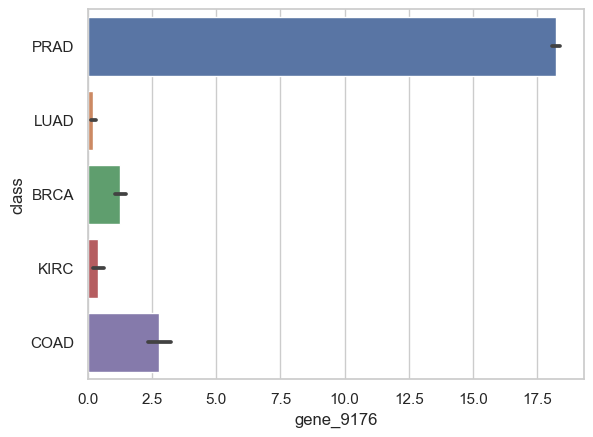

In [195]:
sns.barplot(x='gene_9176', y='class',data=df)

In [196]:
luad_data = df[df['class'] == 'LUAD']
mean_expression_by_gene = luad_data.loc[:, 'gene_0':'gene_20530'].mean()
highest_expression_gene = mean_expression_by_gene.idxmax()
print(f"The gene expressed most highly in LUAD samples is: {highest_expression_gene}")

The gene expressed most highly in LUAD samples is: gene_230


<AxesSubplot:xlabel='gene_230', ylabel='class'>

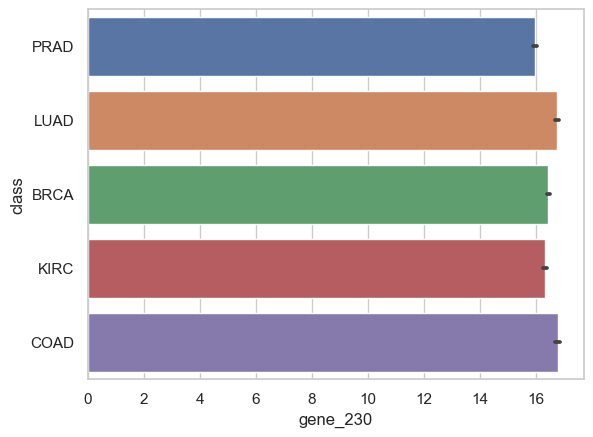

In [197]:
sns.barplot(x='gene_230', y='class',data=df)

In [198]:
brca_data = df[df['class'] == 'BRCA']
mean_expression_by_gene = brca_data.loc[:, 'gene_0':'gene_20530'].mean()
highest_expression_gene = mean_expression_by_gene.idxmax()
print(f"The gene expressed most highly in BRCA samples is: {highest_expression_gene}")

The gene expressed most highly in BRCA samples is: gene_4041


<AxesSubplot:xlabel='gene_4041', ylabel='class'>

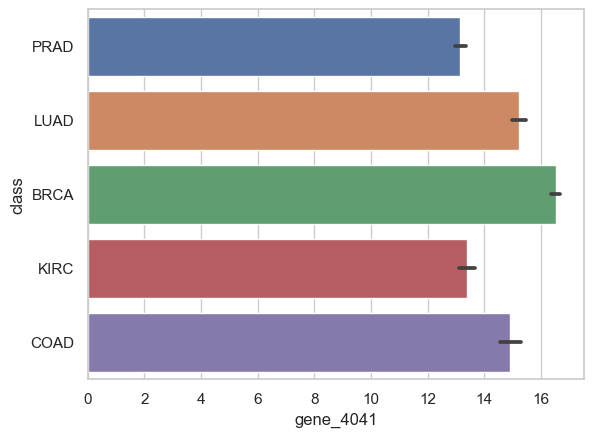

In [199]:
sns.barplot(x='gene_4041', y='class',data=df)

In [200]:
kirc_data = df[df['class'] == 'KIRC']
mean_expression_by_gene = kirc_data.loc[:, 'gene_0':'gene_20530'].mean()
highest_expression_gene = mean_expression_by_gene.idxmax()
print(f"The gene expressed most highly in KIRC samples is: {highest_expression_gene}")

The gene expressed most highly in KIRC samples is: gene_5380


<AxesSubplot:xlabel='gene_5380', ylabel='class'>

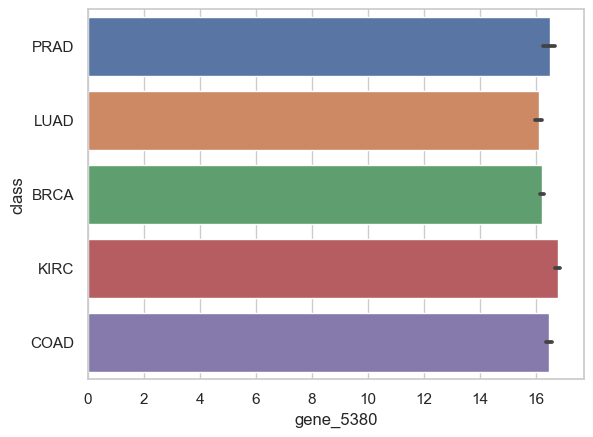

In [201]:
sns.barplot(x='gene_5380', y='class',data=df)

In [202]:
coad_data = df[df['class'] == 'COAD']
mean_expression_by_gene = coad_data.loc[:, 'gene_0':'gene_20530'].mean()
highest_expression_gene = mean_expression_by_gene.idxmax()
print(f"The gene expressed most highly in COAD samples is: {highest_expression_gene}")

The gene expressed most highly in COAD samples is: gene_230


<AxesSubplot:xlabel='gene_230', ylabel='class'>

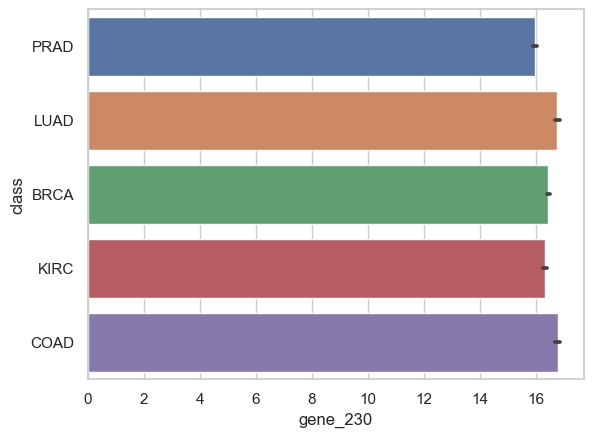

In [293]:
sns.barplot(x='gene_230', y='class',data=df)

* Based on the above analysis, we observe that genes, specifically gene_230, gene_4041, and gene_5380, exhibit very similar expression levels across all five cancer types. In contrast, gene_9176 demonstrates a significantly higher expression level primarily in the PRAD class.

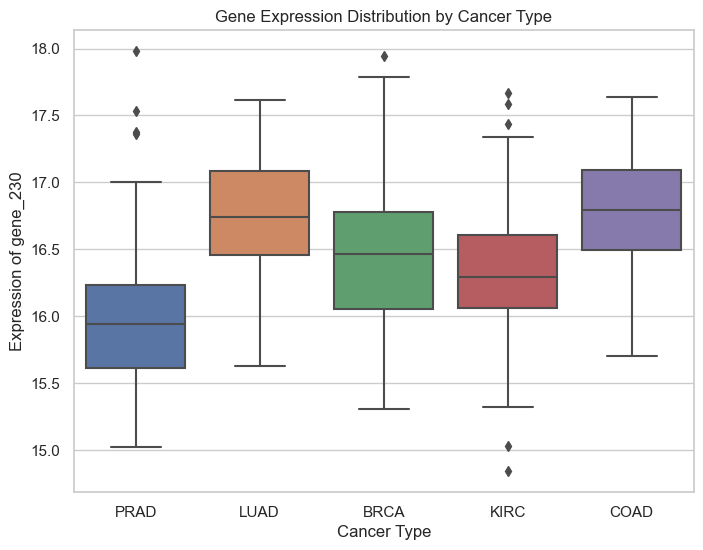

In [203]:
# Gene expression using boxplot for gene_230, which appear to be highly expressed in two cancer types (LUAD and COAD) 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='gene_230')
plt.xlabel('Cancer Type')
plt.ylabel('Expression of gene_230')
plt.title('Gene Expression Distribution by Cancer Type')
plt.show()

In [204]:
# Plot the correlation for the highly expressed genes per class
subset_df.corr()

,gene_230,gene_4041,gene_9176,gene_5380
gene_230,1.000000,0.420329,-0.343672,-0.061852
gene_4041,0.420329,1.000000,-0.359511,-0.208406
gene_9176,-0.343672,-0.359511,1.000000,0.080679
gene_5380,-0.061852,-0.208406,0.080679,1.000000


<AxesSubplot:>

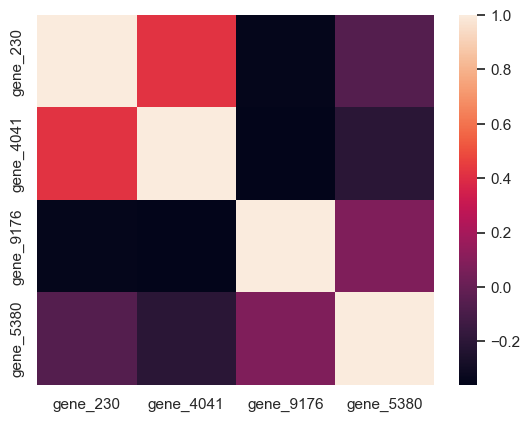

In [205]:
# Create heatmap to visulaize the correlation
sns.heatmap(subset_df.corr())

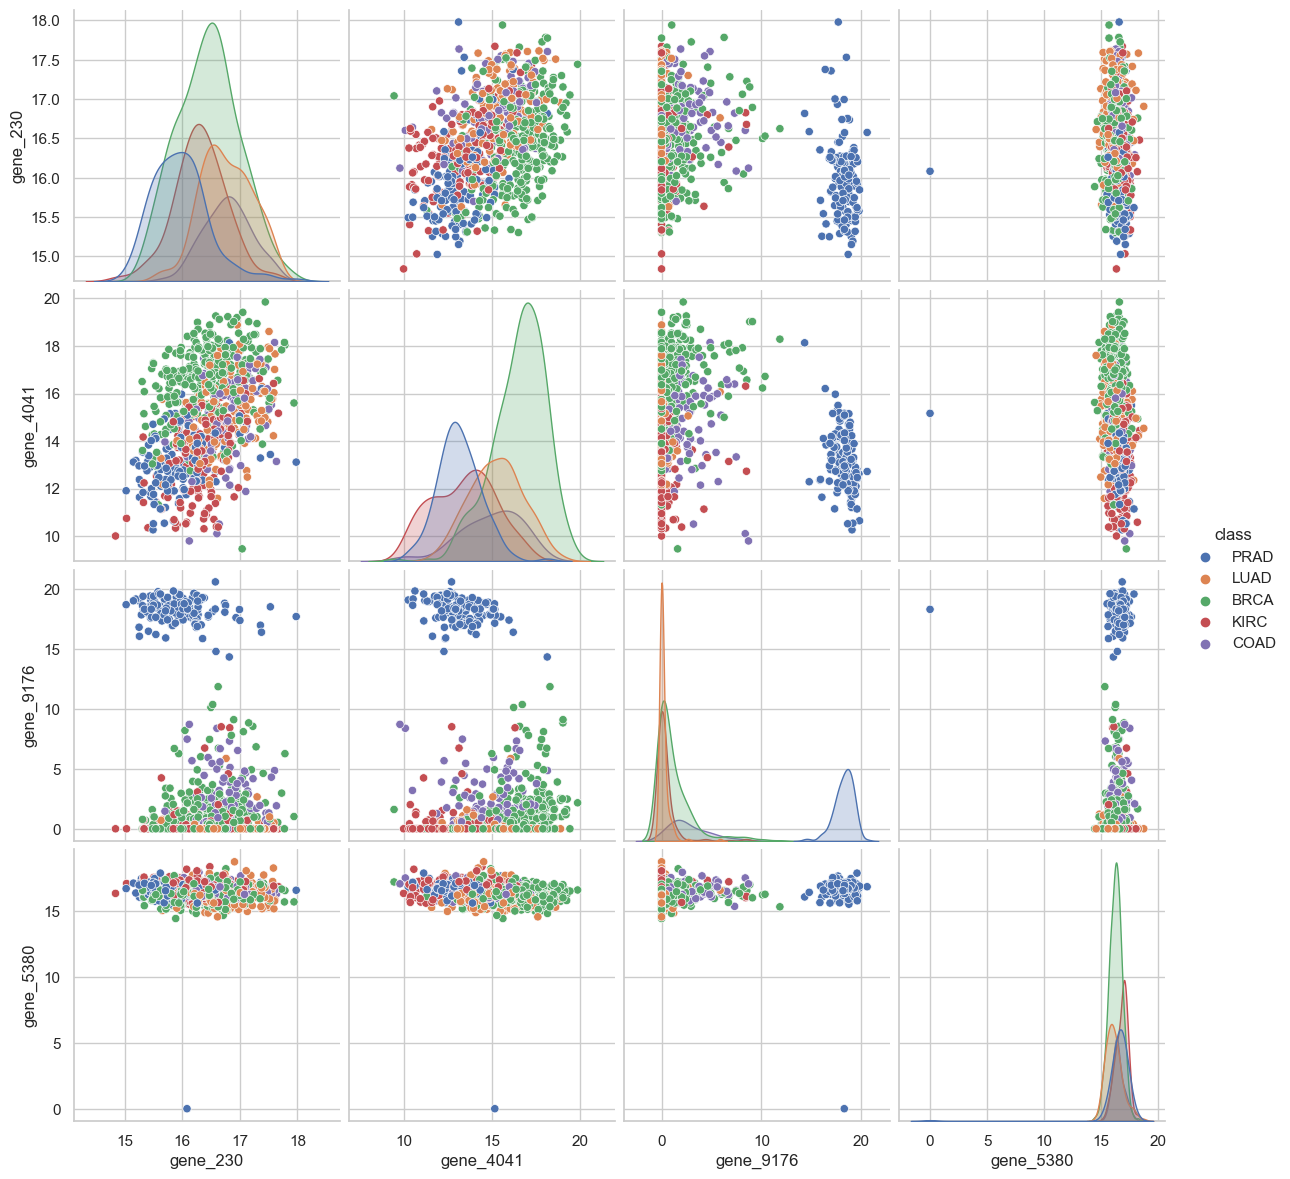

In [206]:
#Create pairplot for those three genes
subset_df = df[['gene_230','gene_4041','gene_9176','gene_5380' ,'class']]
sns.set_style('whitegrid')
sns.pairplot(subset_df,hue='class', size=3)
plt.show()

### Principle Component Analysis (PCA) to reduce the data dimentionality to 2D.

In [258]:
# Will use Stander Scaler to scale the data.
# This step will standardizes the data to have a mean of 0 and a standard deviation of 1 which will center the data to the zero axis.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gene_columns)

In [208]:
gene_columns.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


In [209]:
(scaled_data[:10])

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935, -0.13003831, -1.26286657, ..., -0.66345353,
         0.49374258, -0.26190144],
       [-0.19479935,  0.81762653, -0.30294733, ...,  1.41886843,
         1.10980587, -0.26190144],
       [-0.19479935,  0.52628604,  1.24721912, ..., -0.18886866,
        -0.3710506 , -0.26190144]])

* The scaled data has a mean of 0 and a standard deviation of 1.

In [281]:
# Create a PCA instance with the desired number of components which I will use 2 feautures of my data
variance = 2
pca = PCA(n_components=variance)

# Fit PCA to the scaled data
principal_components = pca.fit_transform(scaled_data)

In [282]:
principal_components

array([[-57.44698704,  95.41098052],
       [-16.91942988,   0.73247072],
       [-70.3452178 , -19.3033264 ],
       ...,
       [ -4.13308992,  15.6900133 ],
       [-30.81475746,  33.52642254],
       [-22.3445567 ,   4.0523563 ]])

* We have reduced the dimensionality to just two features.

In [284]:
pca.explained_variance_

array([2138.4510195 , 1776.17511467])

In [285]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.10539781 0.08754232]


* PC1 captured 10% of the data

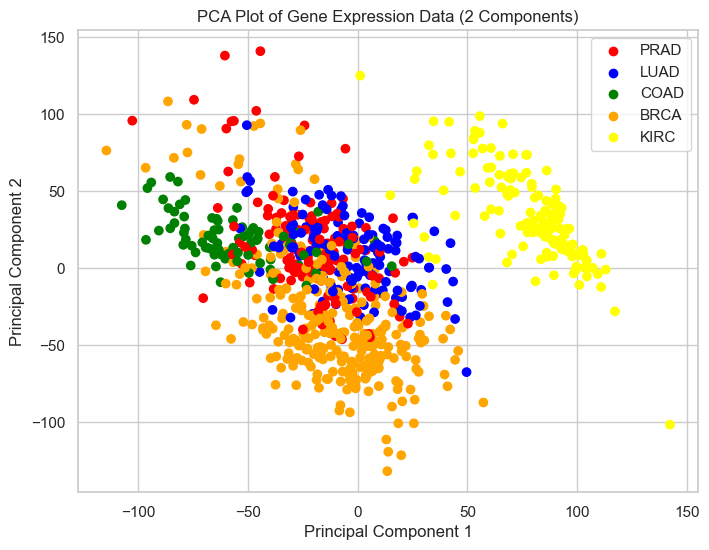

In [291]:
class_colors = {
    'PRAD': 'red',
    'LUAD': 'blue',
    'COAD': 'green',
    'BRCA': 'orange',
    'KIRC': 'yellow'}
colors = df['class'].map(class_colors)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
for cancer_type, color in class_colors.items():
    plt.scatter([], [], c=color, label=cancer_type)
plt.legend()    
plt.title("PCA Plot of Gene Expression Data (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Data Preprocessing:  
In this initial data preprocessing step, we partition the dataset into two essential components for scikit-learn: the features, representing the input variables, and the target variable, which is the value we want to predict using machine learning techniques.

In [213]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [214]:
X.shape

(801, 20531)

In [215]:
y.shape

(801,)

In [216]:
y.name

'class'

### Encoding and preparing labels for a classification task.

In [217]:
#Will use label encoding to convert categorical labels into numerical format in the class column. 
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)
nclasses=np.unique(y).shape[0]

In [218]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [219]:
classes

array([0, 1, 2, 3, 4])

### Data splitting into train, validation, and test sets

In [220]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y_encoded,test_size=0.2,stratify=y, random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.2)

### Data normalization and feature scaling using Min-Max Scaling

In [221]:
# To ensures all the gene expression values in the range between 0 and 1.  
min_max_scaler=MinMaxScaler()
X_train_nor=min_max_scaler.fit_transform(X_train)
X_temp_nor=min_max_scaler.fit_transform(X_temp)
X_val_nor = min_max_scaler.transform(X_val)
X_test_nor = min_max_scaler.transform(X_test)

In [222]:
X_train.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
391,0.00000,4.094565,4.704501,7.545559,9.752299,0.0,8.595821,0.859970,0.0,0.0,...,4.598568,7.654557,10.089887,7.107677,8.832156,12.816038,9.317229,9.461801,9.258929,0.0
148,0.00000,6.237034,5.043235,6.297397,10.391415,0.0,7.669941,0.913033,0.0,0.0,...,5.669299,8.437523,10.524503,1.467801,9.666187,11.258572,10.062033,9.018030,7.737159,0.0
595,0.00000,3.028304,2.156138,6.459537,9.488378,0.0,5.319195,0.000000,0.0,0.0,...,6.436851,8.557640,9.749657,5.406037,10.590297,11.449572,9.303614,9.228160,4.403943,0.0
770,0.00000,2.706995,3.574586,6.090422,9.557619,0.0,7.162452,0.467175,0.0,0.0,...,6.261474,9.005094,9.897212,6.405101,9.971630,12.057508,9.898369,9.835752,4.649144,0.0
493,0.54201,3.522621,3.463021,8.266037,10.431341,0.0,7.536667,0.000000,0.0,0.0,...,4.848788,8.581671,9.682631,0.542010,8.867365,12.051070,10.181786,8.857471,2.792439,0.0
706,0.00000,3.913167,4.064193,6.530920,9.702678,0.0,8.404367,0.566084,0.0,0.0,...,5.301701,8.260317,9.720046,5.513810,9.539921,12.177852,9.465385,9.314588,3.946366,0.0
526,0.00000,2.463492,3.442293,6.850874,9.415991,0.0,7.270968,0.000000,0.0,0.0,...,6.622088,9.022593,10.219907,2.886277,10.212630,11.027982,10.388082,9.968667,7.738680,0.0
480,0.00000,2.676809,3.955629,6.639035,10.301165,0.0,7.946497,0.808426,0.0,0.0,...,6.306275,9.071972,10.136145,7.163640,10.286477,10.573922,9.523879,10.355120,3.525868,0.0
223,0.00000,2.870404,1.268614,6.516157,9.287569,0.0,6.674658,0.825541,0.0,0.0,...,7.017599,8.560134,9.703589,5.989782,10.192428,11.646392,10.495325,9.885373,4.199633,0.0
455,0.00000,3.069737,3.623200,6.744955,9.591219,0.0,7.254254,0.000000,0.0,0.0,...,6.449447,8.276566,9.765221,3.339038,10.245957,12.200892,10.292529,9.378830,5.152070,0.0


In [223]:
X_train.shape

(640, 20531)

In [224]:
print(X_train_nor[:10])

[[0.         0.6564924  0.77587434 ... 0.31023121 0.81653479 0.        ]
 [0.         1.         0.8317389  ... 0.21889984 0.67313211 0.        ]
 [0.         0.4855359  0.35559389 ... 0.26214608 0.35902915 0.        ]
 ...
 [0.         0.4291798  0.65236905 ... 0.49408323 0.27628455 0.        ]
 [0.         0.46021942 0.20922198 ... 0.39740569 0.33977622 0.        ]
 [0.         0.4921789  0.59754424 ... 0.29315524 0.42952831 0.        ]]


### Feature Selection using Mutual Information
Using Mutual Information (MI) as a preliminary step before diving into machine learning, particularly random forest classification, is a crucial choice when dealing with complex datasets like mine. With 801 samples and a staggering 20,531 genes to consider, understanding the relevance and relationships between these features is paramount. MI helps us identify which genes have the most significant impact on predicting the cancer type, thereby allowing us to prioritize and select informative features. This feature selection process not only enhances the efficiency of the subsequent machine learning model but also contributes to its interpretability, making it an essential step in my data analysis pipeline.

In [225]:
from sklearn.feature_selection import mutual_info_classif

In [226]:
MI=mutual_info_classif(X_train_nor,y_train)

In [227]:
MI.shape

(20531,)

In [228]:
features=X_train.columns
features.shape

(20531,)

In [229]:
# Will select top n features, will take 300
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [230]:
X_train_selected=X_train_nor[:,selected_scores_indices]
X_temp_selected=X_temp_nor[:,selected_scores_indices]

In [231]:
X_train_selected.shape

(640, 300)

In [232]:
X_temp_selected.shape

(161, 300)

### Calssification: Random Forest Classifier  
Random Forest is an ideal choice for this dataset due to its ability to handle high-dimensional data efficiently. With more than 20,000 gene features, feature selection becomes crucial to prevent overfitting and reduce noise. Random Forest automatically selects informative features during the tree-building process, ensuring that only relevant genes contribute to classification.  

Moreover, Random Forest's ensemble learning approach combines multiple decision trees, mitigating the risk of overfitting often associated with individual trees. This ensemble nature enhances the model's robustness, which is essential when dealing with real-world genetic datasets that may contain outliers or anomalies.  

Cancer classification often involves complex, non-linear interactions between genes. Random Forest excels at capturing these intricate relationships, making it well-suited for uncovering hidden patterns within genetic data.  

Additionally, the model's built-in feature importance score aids in identifying key genes relevant to cancer classification, facilitating biological interpretation.  

The use of the OneVsRestClassifier technique is particularly helpful when dealing with imbalanced class distributions in a multi-class classification problem. This approach allows us to transform the multi-class problem into multiple binary classification tasks, addressing potential challenges posed by class imbalances.

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_temp_selected)
pred_prob = RF.predict_proba(X_temp_selected)

### Model Evaluations:  
These metrics will help assess the classifier's performance. 
- Accuracy  
- Precision
- Recall
- F1 Score
- Confusion Matrix
- ROC Curve
    

In [234]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#ассuгасу
accuracy=np.round (balanced_accuracy_score (y_temp,y_pred) ,4)
print ('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_temp,y_pred, average = 'weighted' ), 4)
print ('precision:%0.4f'%precision)

#recall
recall=np.round (recall_score(y_temp,y_pred, average = 'weighted'),4)
print ('recall:%0.4f'%recall)

#flscore
f1score=np.round(f1_score(y_temp,y_pred, average = 'weighted'),4)
print ('f1score:%0.4f'%f1score)

report=classification_report(y_temp,y_pred, target_names=labels)
print ('\n' )
print('classification report\n\n' )
print (report)

accuracy:0.9857
precision:0.9880
recall:0.9876
f1score:0.9874


classification report


              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



### Confusion Matrix
Next, we will generate the confusion matrix, which provides a clear visual representation of the model's performance. The confusion matrix allows us to assess how well the model is classifying instances and identify any patterns of misclassification, making it a valuable tool for evaluating our model's accuracy and identifying areas for improvement.

In [235]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_temp,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,16,0,0,0
KIRC,0,0,30,0,0
LUAD,2,0,0,26,0
PRAD,0,0,0,0,27


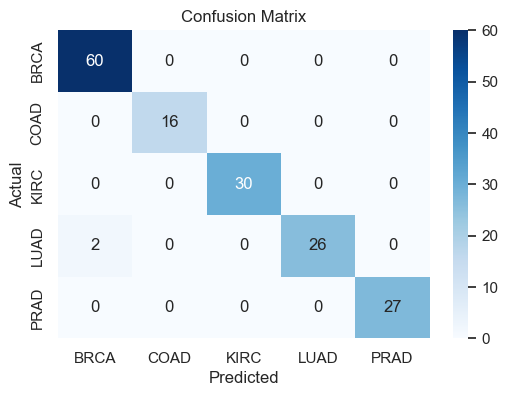

In [236]:
#Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve Analysis for Cancer Type Classification
Employing ROC analysis post-classification is crucial for evaluating the performance of my random forest model in predicting cancer types. With 5 distinct classes in my dataset, the ROC curve provides a comprehensive assessment of the model's ability to differentiate between these classes by plotting the trade-off between true positive and false positive rates. This analysis ensures that the model performs well across various class imbalances and thresholds, and the AUC-ROC metric quantifies its predictive accuracy.

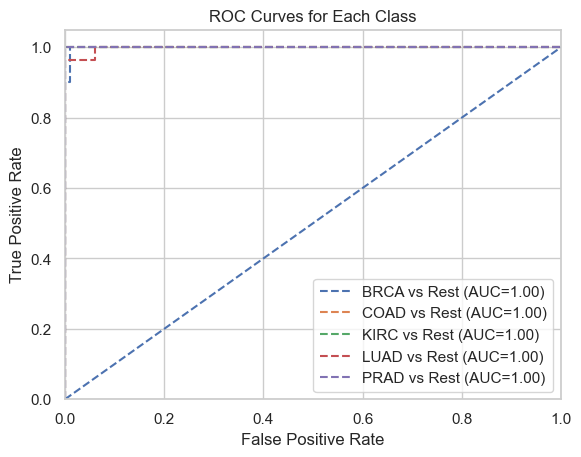

In [237]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(y_temp,classes=classes)
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i],pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i],tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'b--') # Plot the diagonal line
plt.xlim([0,1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

### Building the Neural Network Model

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

#Two hidden layers and one output layer
model = Sequential()
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

#Optimizing neural network with Adam

opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=opt_adam,
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

### Fitting the training set to the model

In [248]:
history =model.fit(X_train,y_train,validation_data=(X_val,y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
20/20 [==============================] - 1s 18ms/step - loss: 47.2111 - sparse_categorical_accuracy: 0.3344 - val_loss: 13.6515 - val_sparse_categorical_accuracy: 0.4844
Epoch 2/200
20/20 [==============================] - 0s 11ms/step - loss: 6.7350 - sparse_categorical_accuracy: 0.5703 - val_loss: 2.1134 - val_sparse_categorical_accuracy: 0.7344
Epoch 3/200
20/20 [==============================] - 0s 11ms/step - loss: 1.2609 - sparse_categorical_accuracy: 0.7594 - val_loss: 0.2847 - val_sparse_categorical_accuracy: 0.9141
Epoch 4/200
20/20 [==============================] - 0s 10ms/step - loss: 0.2785 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.1150 - val_sparse_categorical_accuracy: 0.9922
Epoch 5/200
20/20 [==============================] - 0s 10ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/200
20/20 [==============================] - 0s 10ms/step - loss: 0.0467 - sparse_categori

Epoch 91/200
20/20 [==============================] - 0s 9ms/step - loss: 5.4178e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0201 - val_sparse_categorical_accuracy: 0.9922
Epoch 92/200
20/20 [==============================] - 0s 8ms/step - loss: 5.3655e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0201 - val_sparse_categorical_accuracy: 0.9922
Epoch 93/200
20/20 [==============================] - 0s 10ms/step - loss: 5.2434e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0197 - val_sparse_categorical_accuracy: 0.9922
Epoch 94/200
20/20 [==============================] - 0s 9ms/step - loss: 5.1060e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_sparse_categorical_accuracy: 0.9922
Epoch 95/200
20/20 [==============================] - 0s 9ms/step - loss: 5.0757e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0192 - val_sparse_categorical_accuracy: 0.9922
Epoch 96/200
20/20 [==============================] - 0s 9ms/step - loss: 4.953

20/20 [==============================] - 0s 9ms/step - loss: 1.4261e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0223 - val_sparse_categorical_accuracy: 0.9922
Epoch 180/200
20/20 [==============================] - 0s 11ms/step - loss: 1.3899e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0221 - val_sparse_categorical_accuracy: 0.9922
Epoch 181/200
20/20 [==============================] - 0s 10ms/step - loss: 1.3733e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0217 - val_sparse_categorical_accuracy: 0.9922
Epoch 182/200
20/20 [==============================] - 0s 10ms/step - loss: 1.3548e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0228 - val_sparse_categorical_accuracy: 0.9922
Epoch 183/200
20/20 [==============================] - 0s 10ms/step - loss: 1.3414e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0219 - val_sparse_categorical_accuracy: 0.9922
Epoch 184/200
20/20 [==============================] - 0s 10ms/step - loss: 1.3229e-0

In [249]:
predictions = model.predict(X_test)
_,accuracy = model.evaluate(X_test,y_test, verbose=0) 

2/2 [==============================] - 0s 3ms/step


In [250]:
accuracy

0.9696969985961914

In [251]:
predictions[0]

array([5.8688795e-05, 4.5776138e-13, 1.0905656e-07, 6.6561932e-07,
       9.9994045e-01], dtype=float32)

In [252]:
np.argmax(predictions[0])

4

In [253]:
classes

array([0, 1, 2, 3, 4])

In [254]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [255]:
for index,entry in enumerate(predictions[0:100,:]):
    print('predicted:%d) , actual:%d' %(np.argmax(entry),y_test[index]))
    

predicted:4) , actual:4
predicted:0) , actual:0
predicted:4) , actual:4
predicted:0) , actual:0
predicted:0) , actual:0
predicted:2) , actual:2
predicted:1) , actual:1
predicted:3) , actual:3
predicted:1) , actual:1
predicted:2) , actual:2
predicted:4) , actual:4
predicted:0) , actual:0
predicted:0) , actual:0
predicted:3) , actual:3
predicted:1) , actual:1
predicted:0) , actual:0
predicted:0) , actual:0
predicted:2) , actual:2
predicted:0) , actual:0
predicted:0) , actual:0
predicted:2) , actual:2
predicted:2) , actual:2
predicted:0) , actual:0
predicted:4) , actual:4
predicted:2) , actual:2
predicted:0) , actual:0
predicted:0) , actual:0
predicted:0) , actual:0
predicted:4) , actual:4
predicted:3) , actual:1
predicted:3) , actual:3
predicted:2) , actual:2
predicted:4) , actual:4


<function matplotlib.pyplot.show(close=None, block=None)>

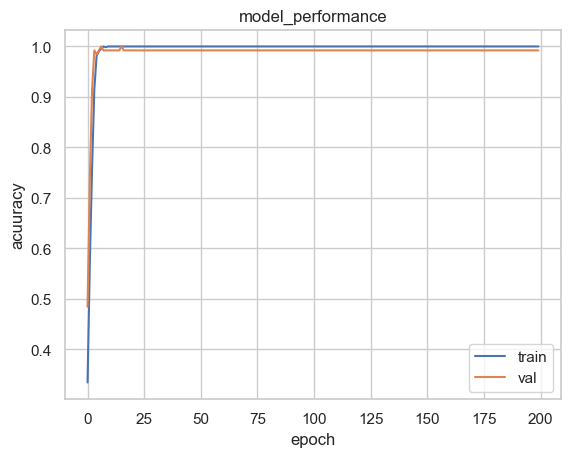

In [256]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_performance')
plt.ylabel('acuuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

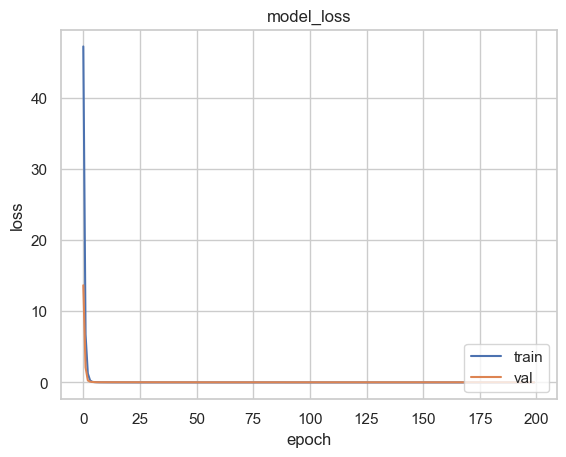

In [257]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc= 'lower right')
plt.show

### Conclusion:    
In summary, the model evaluation results demonstrate the exceptional performance of the random forest classifier in accurately classifying cancer types. With a precision score of 0.9880, the model excelled in correctly identifying instances for each class while keeping false positives to a minimum. Additionally, a recall score of 0.9876 indicated the model's ability to effectively capture a significant portion of true positive cases, minimizing false negatives. This balance between precision and recall was reflected in an impressive F1 score of 0.9874, demonstrating the model's overall strength. The classification report further emphasized the model's robustness, displaying high precision, recall, and F1 scores across all classes. The confusion matrix revealed minimal misclassifications, reinforcing the model's exceptional performance. Finally, the ROC curve analysis, with AUC values of 1 for each class, underscored the model's excellence in classification. In summary, the random forest classifier has proven to be a highly reliable and effective tool for accurately classifying cancer types, offering immense promise in the field of medical diagnostics. 

In the course of this project, I developed a neural network machine learning model that demonstrated outstanding performance. Notably, the model achieved an accuracy score of 0.96, indicating its exceptional ability to fit the training data. 

### Future Work:  
   * While this high accuracy score is promising, the model need further investigation to ensure its generalizability to real-world scenarios.